In [1]:
from database.TradeHistory import get_session
import pandas as pd
session = get_session()

In [2]:
print('loading')
df = pd.read_sql_query("select * from history", session.bind)
print('loaded')
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2016-03':]
df = df[['id', 'price', 'size']]
bench_price = df.price.resample('1Min').mean().fillna(method='ffill')
bench_size = df['size'].resample('1Min').sum().fillna(0)
dfb = pd.DataFrame([bench_price, bench_size]).T

loading
loaded


In [3]:
dfb

,price,size
exec_date,,
2016-03-01 00:01:00,4.990433e+04,0.439000
2016-03-01 00:02:00,4.988900e+04,0.060000
2016-03-01 00:03:00,4.991577e+04,4.496000
2016-03-01 00:04:00,4.991524e+04,0.586900
2016-03-01 00:05:00,4.991371e+04,0.873500
2016-03-01 00:06:00,4.992550e+04,0.936000
2016-03-01 00:07:00,4.994281e+04,1.995000
2016-03-01 00:08:00,4.994500e+04,0.736000
2016-03-01 00:09:00,4.995500e+04,0.500000


In [4]:
dfb.to_sql('history1min', session.bind, chunksize=1000, if_exists='append')

In [17]:
df.tail(5)

,id,price,size
exec_date,,,
2018-01-11 14:22:16,111342754,1744900,0.010
2018-01-11 14:22:17,111342758,1744900,0.030
2018-01-11 14:22:21,111342800,1744900,0.059
2018-01-11 14:22:21,111342804,1744900,0.010
2018-01-11 14:22:21,111342807,1744900,0.001


In [24]:
%matplotlib inline

price_std = []
size_std = []
for i in range(100):
    diffs_price = (dfb.price / dfb.price.shift(-i) - 1)
    diffs_size = (dfb['size'] / dfb['size'].shift(-i).replace(0, 0.00001) - 1)
    price_std.append(diffs_price.std())
    size_std.append(diffs_size.std())

In [10]:
from matplotlib import pyplot as plt

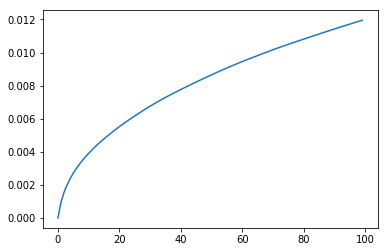

In [18]:
plt.plot(range(100), price_std)

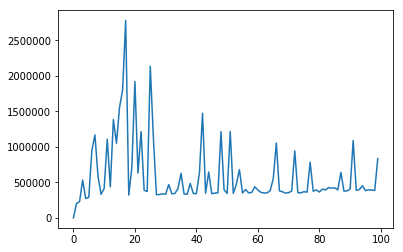

In [25]:
plt.plot(range(100), size_std)

In [26]:
dfb[dfb['size'] == 0].count()

price    60980
size     60980
dtype: int64

In [27]:
from scipy import stats

In [29]:
diff0 = (dfb.price / dfb.price.shift(-1) - 1).fillna(0)
stats.pearsonr(diff0, diff0.shift(1).fillna(0))

(0.33048740439230528, 0.0)

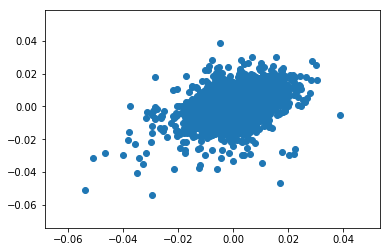

In [30]:
plt.scatter(diff0, diff0.shift(1))

In [32]:
diff0[(diff0 > 0) & (diff0.shift(1) > 0)].count()

238989

In [33]:
diff0[(diff0 > 0) & (diff0.shift(1) < 0)].count()

197997

In [34]:
diff0[(diff0 < 0) & (diff0.shift(1) < 0)].count()

251794

In [35]:
diff0[(diff0 < 0) & (diff0.shift(1) > 0)].count()

197733

In [36]:
251794 / (251794 + 197733)

0.5601309821212074